### Storytelling Data Visualization on Exchange Rates

there are two types of data visualization:
 * Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
 * Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

### Importing Dictionaries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Importing Data

In [2]:
data = pd.read_csv("euro-daily-hist_1999_2022.csv")
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [3]:
data.shape

(6456, 41)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

#### Changing Columns Name

In [5]:
data.rename(columns={'Period\\Unit:':'Time','[US dollar ]':'USD'},inplace=True)

In [6]:
data.columns

Index(['Time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'USD', '[South African rand ]'],
      dtype='object')

In [7]:
data['Time'] = pd.to_datetime(data['Time'])

In [8]:
data.sort_values('Time',inplace=True)

In [9]:
data.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],USD,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [10]:
euro_to_usd = data[['Time','USD']].copy()
euro_to_usd['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: USD, Length: 3769, dtype: int64


we have 62 dashes that may be due to holidays or some other reasons

##### changing type from int to float

In [11]:
euro_to_usd = euro_to_usd[euro_to_usd['USD'] != '-']
euro_to_usd['USD'] = euro_to_usd['USD'].astype(float)
euro_to_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6394 non-null   datetime64[ns]
 1   USD     6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


##### Now we have time in datetime and usd in float types

#### Rolling Mean (Moving Avg) Graph

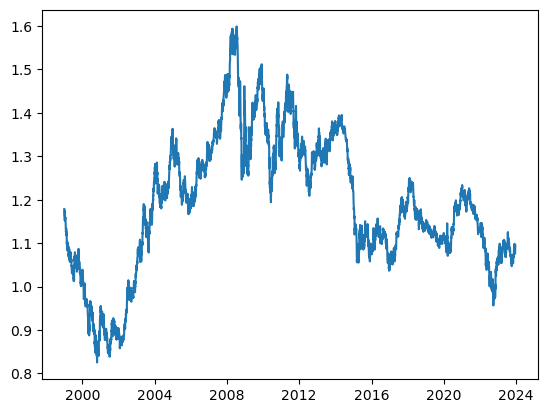

In [12]:
plt.plot(euro_to_usd['Time'],euro_to_usd['USD'])
plt.show()


If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

In [13]:
values = pd.DataFrame() # create empty data frame and store in values 
values['daily'] = pd.Series(range(1,20,2)) # number generate  from 1 to 20 with diff of 2 and store in daily column
values

,daily
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [14]:
values['rolling_2'] = values['daily'].rolling(2).mean()
values['rolling_3'] = values['daily'].rolling(3).mean()
values['rolling_4'] = values['daily'].rolling(4).mean()
values

,daily,rolling_2,rolling_3,rolling_4
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,4.0
4,9,8.0,7.0,6.0
5,11,10.0,9.0,8.0
6,13,12.0,11.0,10.0
7,15,14.0,13.0,12.0
8,17,16.0,15.0,14.0
9,19,18.0,17.0,16.0


In [15]:
euro_to_usd['Rolling_30'] = euro_to_usd['USD'].rolling(30).mean()

#### similarly we will graph the orignal values using rolling mean

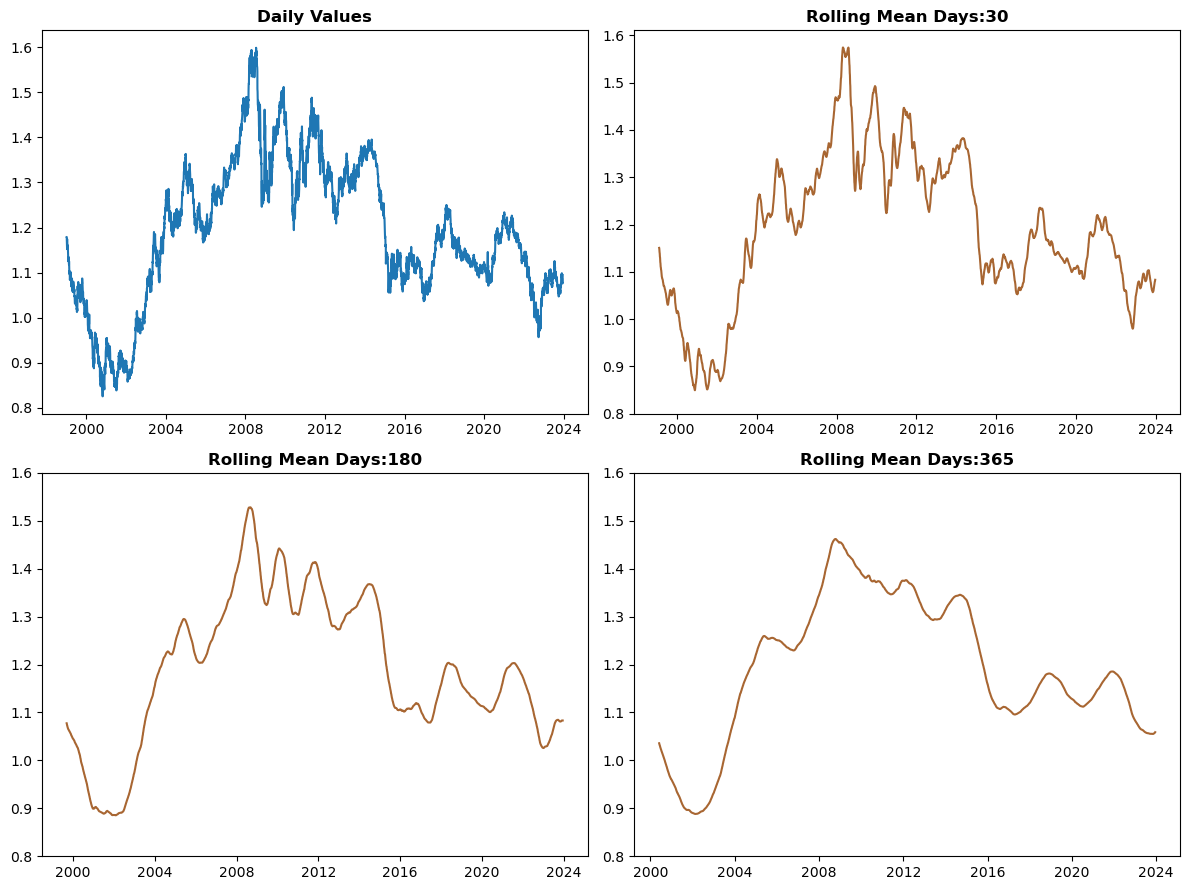

In [16]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.plot(euro_to_usd['Time'],euro_to_usd['USD'])
plt.title('Daily Values', weight = 'bold')

for i, rolling_mean in zip([2,3,4], #2=graph2,3=graph3...
                          [30,180,365]): #30=roll_mean_30_values,180=6_months_values...
    plt.subplot(2,2,i)
    plt.plot(euro_to_usd['Time'],euro_to_usd['USD'].rolling(rolling_mean).mean(),color = '#a86632')
    plt.title('Rolling Mean Days:' + str(rolling_mean), weight = 'bold') 
    plt.yticks([i/10 for i in range(8, 17)])  # Generate float values from 0.8 to 1.6 with a step of 0.1

plt.tight_layout() # Auto adjust the padding between subplots 
plt.show()

### Coming up with an idea

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W, Bush(2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-20121). We can use a line plot.


### Story Telling & Visualization

Financial Crisis 2007 - 2008:


In [17]:
crisis = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2006) & (euro_to_usd['Time'].dt.year <= 2009)]
crisis_7_8 = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2007) & (euro_to_usd['Time'].dt.year <= 2008)]

In [18]:
crisis

,Time,USD,Rolling_30
4630,2006-01-02,1.1826,1.183087
4629,2006-01-03,1.1875,1.183300
4628,2006-01-04,1.2083,1.184573
4627,2006-01-05,1.2088,1.185613
4626,2006-01-06,1.2093,1.186647
...,...,...,...
3592,2009-12-24,1.4398,1.477640
3590,2009-12-28,1.4405,1.476097
3589,2009-12-29,1.4433,1.474323
3588,2009-12-30,1.4338,1.472533


In [19]:
crisis_7_8

,Time,USD,Rolling_30
4369,2007-01-02,1.3270,1.314257
4368,2007-01-03,1.3231,1.315780
4367,2007-01-04,1.3106,1.316663
4366,2007-01-05,1.3084,1.317563
4365,2007-01-08,1.3006,1.317963
...,...,...,...
3854,2008-12-23,1.3978,1.303717
3853,2008-12-24,1.4005,1.308633
3850,2008-12-29,1.4270,1.314450
3849,2008-12-30,1.4098,1.319193


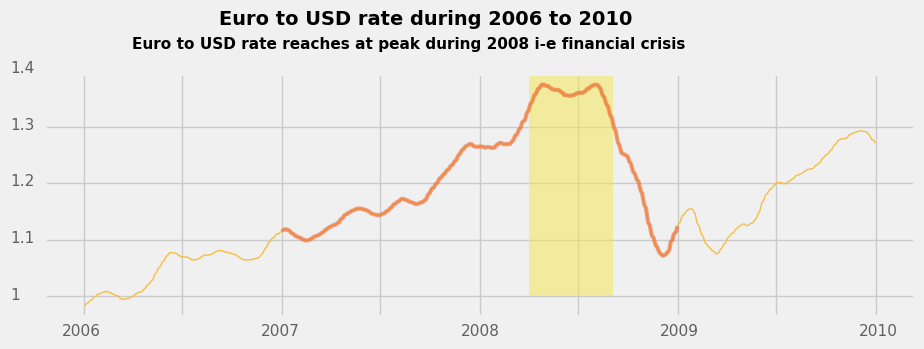

In [20]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(10,3))
ax.plot(crisis['Time'],crisis['Rolling_30'], linewidth = 1, color = '#f5bf42')
ax.plot(crisis_7_8['Time'],crisis_7_8['Rolling_30'],linewidth = 3, color = '#eb6534',alpha=0.6)

ax.set_xticklabels([])

x=0.02
for year in ['2006','2007','2008','2009','2010',]:
    ax.text(x,-0.08, year, alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    x += 0.22888

ax.set_yticklabels([])
y=0.07
for rate in ['1','1.1','1.2','1.3','1.4']:
    ax.text(-0.04,y,rate,alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    y += 0.2333
    
ax.text(0.2,1.2, "Euro to USD rate during 2006 to 2010", weight='bold',transform = plt.gca().transAxes)
ax.text(0.1,1.1, "Euro to USD rate reaches at peak during 2008 i-e financial crisis", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"),ymin=0.09, color='#f5e74e',alpha=0.5)
plt.show()



### Euro to USD Rate During Covid19

In [21]:
covid_20 = euro_to_usd.loc[(euro_to_usd['Time'] >= '2020-01-01') & (euro_to_usd['Time'] <= '2020-12-31')]
covid = euro_to_usd.loc[(euro_to_usd['Time'] >= '2016-01-01') & (euro_to_usd['Time'] <= '2019-12-31')]

In [22]:
covid_20.head()

,Time,USD,Rolling_30
1018,2020-01-02,1.1193,1.109237
1017,2020-01-03,1.1147,1.109470
1016,2020-01-06,1.1194,1.109920
1015,2020-01-07,1.1172,1.110190
1014,2020-01-08,1.1115,1.110380


In [23]:
covid.head()

,Time,USD,Rolling_30
2040,2016-01-04,1.0898,1.081743
2039,2016-01-05,1.0746,1.081937
2038,2016-01-06,1.0742,1.082307
2037,2016-01-07,1.0868,1.083030
2036,2016-01-08,1.0861,1.083947


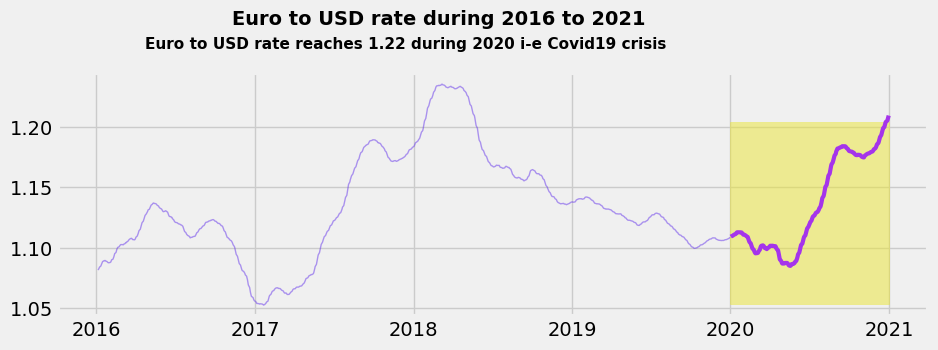

In [24]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(covid['Time'],covid['Rolling_30'],linewidth=1,color='#6434eb', alpha = 0.5)
ax.plot(covid_20['Time'],covid_20['Rolling_30'],linewidth=3,color='#a534eb')

ax.text(0.2,1.2, "Euro to USD rate during 2016 to 2021", weight='bold',transform = plt.gca().transAxes)
ax.text(0.1,1.1, "Euro to USD rate reaches 1.22 during 2020 i-e Covid19 crisis", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2020-01-1"), xmax=pd.to_datetime("2020-12-31"),ymin=0.05,ymax=0.8, color='#ebe534',alpha=0.5)

plt.show()

### The Three US Presidencies Example

In [25]:
all_3 = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2001) & (euro_to_usd['Time'].dt.year < 2021)]
bush = all_3.copy()[(all_3['Time'].dt.year < 2009)]
obama = all_3.copy()[all_3['Time'].dt.year >= 2009 & (all_3['Time'].dt.year < 2017)]
trump = all_3.copy()[all_3['Time'].dt.year >= 2017 & (all_3['Time'].dt.year < 2021)]

Below, you'll notice we used matplotlib's functional approach to build the grphs. We use this approach becuse it offers more flexiblity in arranging the subplots:

* We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom remains empty).
* We then build only the bottom graphs on a 2-by-1 grid (this grid should have two subplots; the top two remains empty).
* The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.


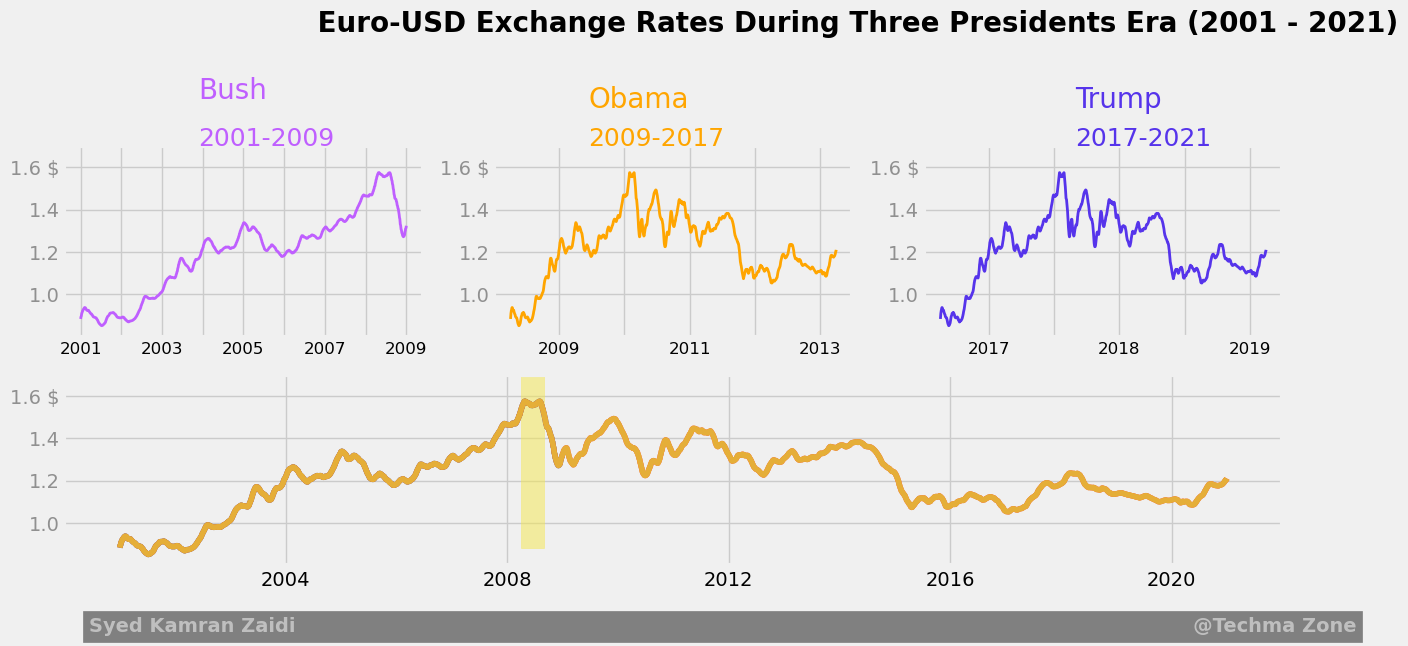

In [26]:
style.use('fivethirtyeight')

plt.figure(figsize=(14,8))

# for subplots
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

#for large plot
ax4 = plt.subplot(3,1,2)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6 $'],alpha=0.4)

#Bush
ax1.plot(bush['Time'], bush['Rolling_30'], linewidth=2, color='#BF5FFF')
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'], fontsize=12)
ax1.text(0.11, 2.45 ,'Bush',fontsize=20,color='#BF5FFF',transform=plt.gca().transAxes)
ax1.text(0.11,2.2 ,'2001-2009',fontsize=18,color='#BF5FFF',transform=plt.gca().transAxes)

#Obama
ax2.plot(obama['Time'],obama['Rolling_30'],linewidth=2,color='#ffa500')
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],fontsize=12)
ax2.text(0.43,2.4,'Obama',fontsize=20,color='#ffa500',transform=plt.gca().transAxes)
ax2.text(0.43,2.2,'2009-2017',fontsize=18,color='#ffa500',transform=plt.gca().transAxes)

#Trump
ax3.plot(trump['Time'],trump['Rolling_30'],linewidth=2,color='#5634eb')
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'],fontsize=12)
ax3.text(0.83,2.4,'Trump',fontsize=20,color='#5634eb',transform=plt.gca().transAxes)
ax3.text(0.83,2.2,'2017-2021',fontsize=18,color='#5634eb',transform=plt.gca().transAxes)

#merging Bush-Obana-trump
ax4.plot(bush['Time'], bush['Rolling_30'])
ax4.plot(obama['Time'], obama['Rolling_30'])
ax4.plot(trump['Time'], trump['Rolling_30'])

ax1.text(0.2, 2.8, ' Euro-USD Exchange Rates During Three Presidents Era (2001 - 2021)', fontsize=20, weight='bold', transform=plt.gca().transAxes)
ax4.text(0.02, -0.35,'Syed Kamran Zaidi' + ' '*133 + '@Techma Zone', size=14,weight='bold',color='white',backgroundcolor='grey',alpha=0.5, transform=plt.gca().transAxes)
ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"),ymin=0.09, color='#f5e74e',alpha=0.5)

plt.show()

### Findings

Euro to USD exchange rates reached at peak during 2008 in Financial Crisis in the era of president Bush.